# Reproduciple Data Analysis 


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
plt.style.use('seaborn-v0_8')
import numpy as np
import matplotlib.pyplot as plt


## Get data

In [2]:
from bikestats.data import get_fremont_data
data = get_fremont_data()
data.head()

5


,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


<Axes: xlabel='Date'>

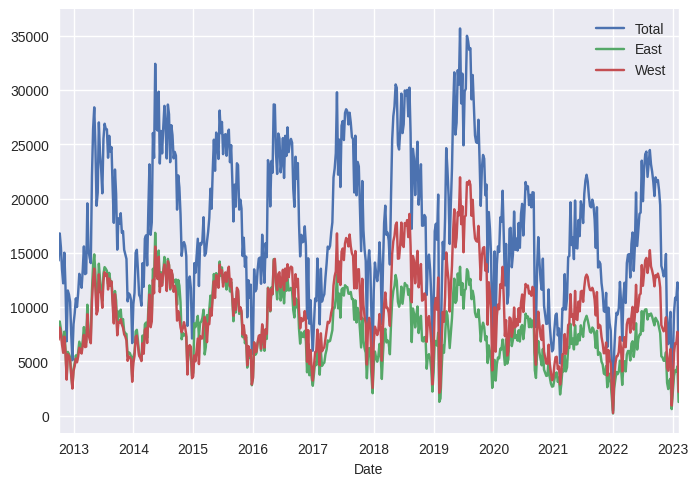

In [3]:
data.resample('W').sum().plot()

(0.0, 1256022.05)

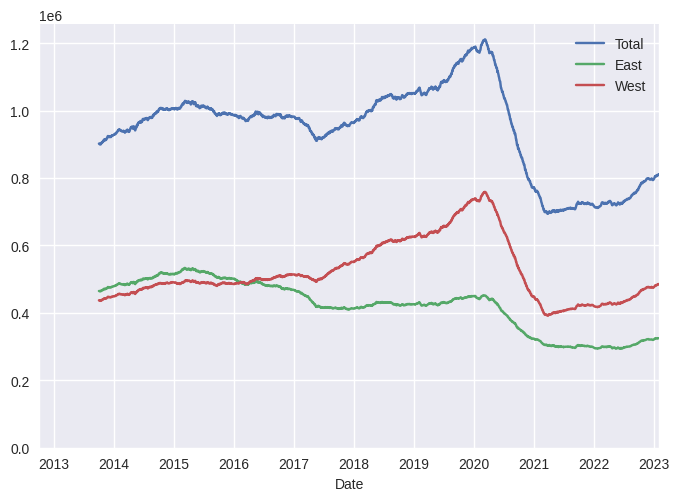

In [4]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<Axes: xlabel='time'>

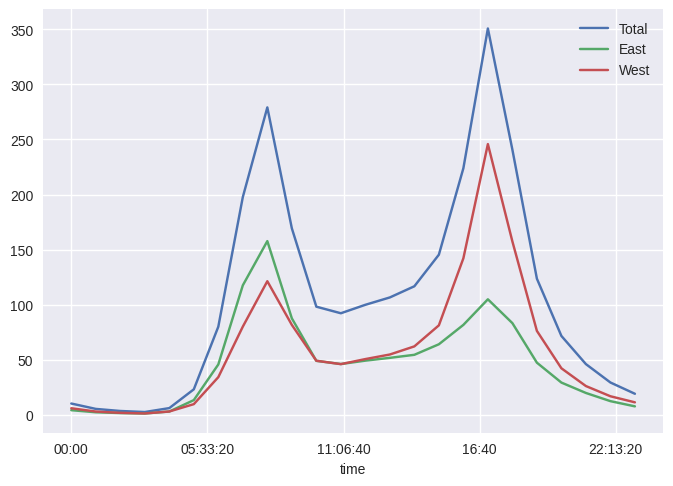

In [5]:
data.groupby(data.index.time).mean().plot()

In [6]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<Axes: xlabel='time'>

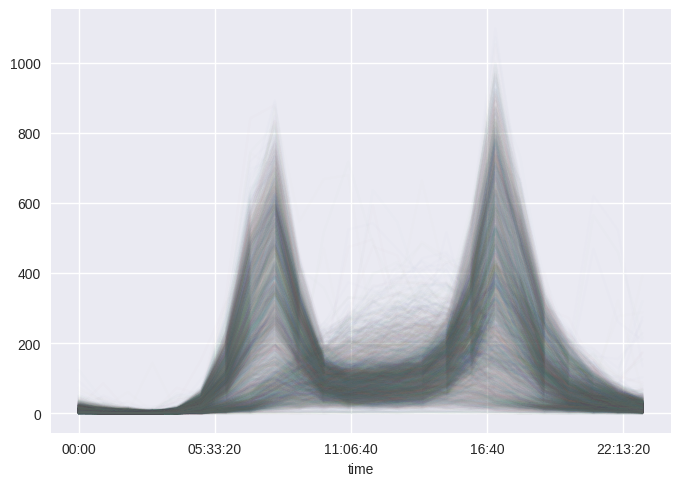

In [7]:
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [8]:
X = pivoted.fillna(0).T.values
X.shape


(3773, 24)

In [9]:

#2dim array
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape


(3773, 2)

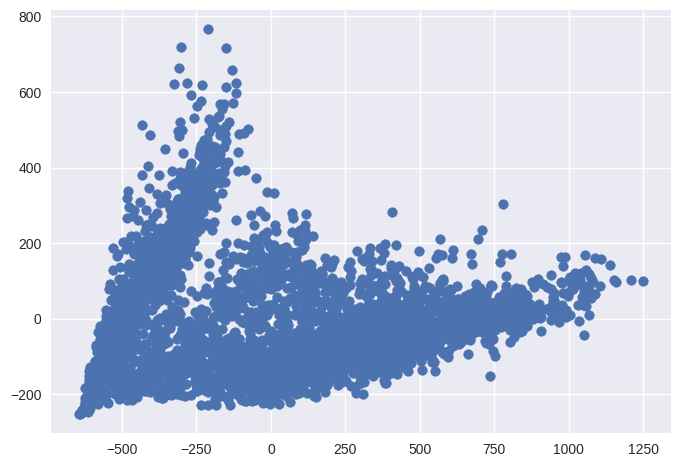

In [10]:

plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [11]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)

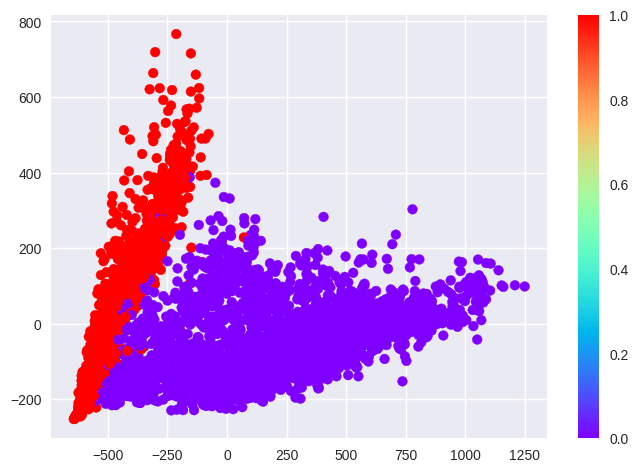

In [12]:
plt.scatter(X2[:,0],X2[:,1], c = labels, cmap = 'rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Weekend')

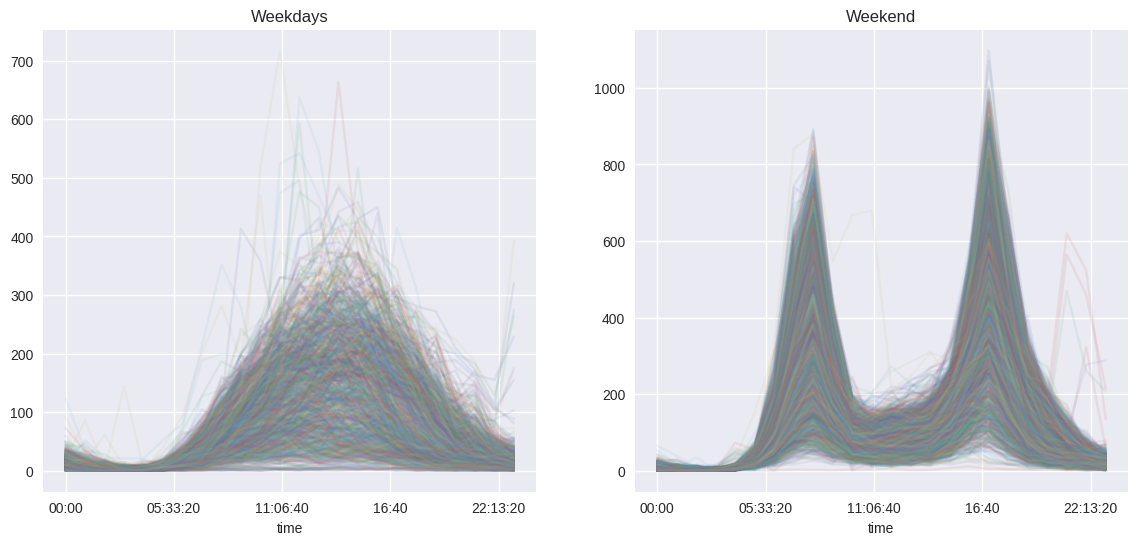

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

#weekdays -> commute
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax = ax[0]);
#weekend -> scattered
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax = ax[1]);

ax[0].set_title('Weekdays')
ax[1].set_title('Weekend')

## Comparing day of week

0 = mon, 1 = tue, 2 = wed, 3 = thu, 4 = fri, 5 = sat, 6 = sun

In [14]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

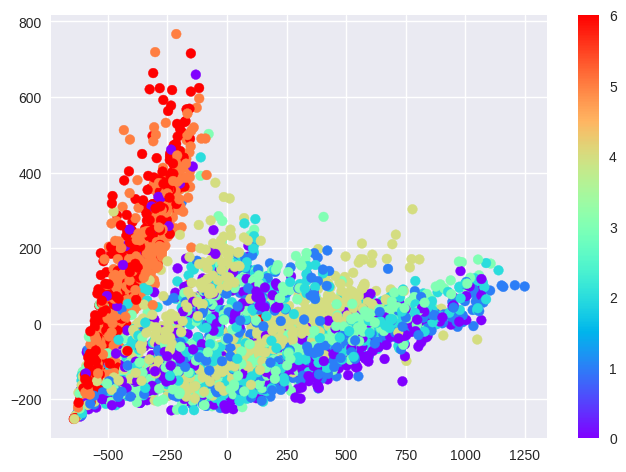

In [15]:
plt.scatter(X2[:,0],X2[:,1], c = dayofweek, cmap = 'rainbow')
plt.colorbar()

## Outliers

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', length=2589, freq=None)